In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('p3.csv',delim_whitespace=True)
df2 = pd.read_csv('p1.csv',delim_whitespace=True)
df3 = pd.read_csv('p2.csv',delim_whitespace=True)

In [3]:
def plot_pareto_frontier(Xs, Ys, maxX=True, maxY=True):
    '''Pareto frontier selection process'''
    sorted_list = sorted([[Xs[i], Ys[i]] for i in range(len(Xs))], reverse=maxY)
    pareto_front = [sorted_list[0]]
    for pair in sorted_list[1:]:
        if maxY:
            if pair[1] >= pareto_front[-1][1]:
                pareto_front.append(pair)
        else:
            if pair[1] <= pareto_front[-1][1]:
                pareto_front.append(pair)
    
    '''Plotting process'''
    plt.scatter(Xs,Ys, color = 'b')
    pf_X = [pair[0] for pair in pareto_front]
    pf_Y = [pair[1] for pair in pareto_front]
    plt.scatter(pf_X, pf_Y, color = 'r')
    plt.plot(pf_X, pf_Y, color = 'r', label = 'Pareto Front')



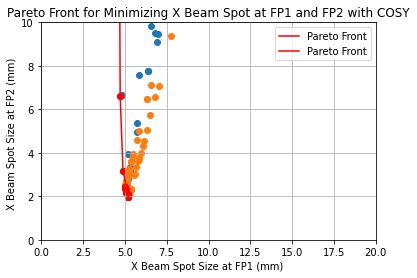

In [7]:
plot_pareto_frontier(df['col1']*1000,df['col2']*1000,maxX=False,maxY=False)
plt.title('Pareto Front for Minimizing X Beam Spot at FP1 and FP2 with COSY')
#plt.scatter(df['col1'][0]*1000,df['col2'][0]*1000, label = 'Initial Soultion')

plot_pareto_frontier(df2['col1']*1000,df2['col2']*1000,maxX=False,maxY=False)
# plt.scatter(df2['col1'][0]*1000,df2['col2'][0]*1000, label = 'Initial Soultion')

plt.xlabel('X Beam Spot Size at FP1 (mm) ')
plt.ylabel('X Beam Spot Size at FP2 (mm) ')
plt.grid()
plt.xlim(0,20)
plt.ylim(0,10)
plt.legend()

In [28]:
df3['col1'].iloc[:40]

0     0.018276
1     0.016953
2     0.017945
3     0.026528
4     0.024620
5     0.023841
6     0.016878
7     0.011905
8     0.007900
9     0.021845
10    0.011943
11    0.017035
12    0.020980
13    0.015928
14    0.006000
15    0.017868
16    0.017749
17    0.005757
18    0.018417
19    0.016822
20    0.012047
21    0.014321
22    0.005987
23    0.007749
24    0.005983
25    0.005748
26    0.017268
27    0.010246
28    0.011946
29    0.020409
30    0.007113
31    0.011455
32    0.004888
33    0.005496
34    0.006821
35    0.006038
36    0.004951
37    0.007901
38    0.005989
39    0.005700
Name: col1, dtype: float64

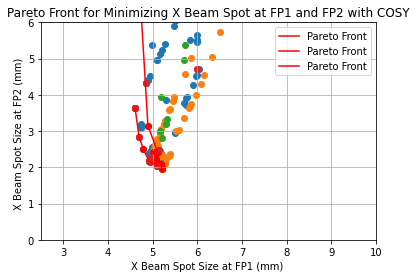

In [39]:
plot_pareto_frontier(df3['col1']*1000,df3['col2']*1000,maxX=False,maxY=False)
plot_pareto_frontier(df2['col1']*1000,df2['col2']*1000,maxX=False,maxY=False)
plot_pareto_frontier(df['col1']*1000,df['col2']*1000,maxX=False,maxY=False)

plt.title('Pareto Front for Minimizing X Beam Spot at FP1 and FP2 with COSY')

plt.scatter(df3['col1'].iloc[90:]*1000, df3['col2'].iloc[90:]*1000)
plt.xlabel('X Beam Spot Size at FP1 (mm) ')
plt.ylabel('X Beam Spot Size at FP2 (mm) ')
plt.grid()
plt.xlim(2.5,10)
plt.ylim(0,6)
plt.legend()

In [45]:
fp1 = list(df['col1']) + list(df2['col1']) +list(df3['col1'])
fp2 = list(df['col2']) + list(df2['col2']) +list(df3['col2'])
fp1 = np.array(fp1)
fp2 = np.array(fp2)

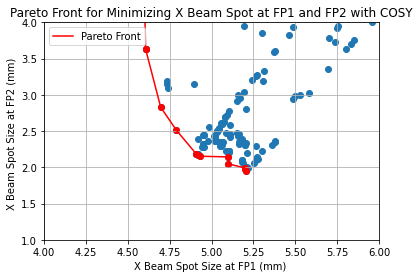

In [48]:
plot_pareto_frontier(fp1*1000,fp2*1000,maxX=False,maxY=False)


plt.title('Pareto Front for Minimizing X Beam Spot at FP1 and FP2 with COSY')

plt.xlabel('X Beam Spot Size at FP1 (mm) ')
plt.ylabel('X Beam Spot Size at FP2 (mm) ')
plt.grid()
plt.xlim(4,6)
plt.ylim(1,4)
plt.legend()